In [18]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import dask 
import random


load one year
(binned dataset as an example)

In [2]:
path_in =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


In [3]:
year = 2020

# read all nc in folder year/ within path_in as xarray dataset

ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
ds




<xarray.Dataset>
Dimensions:    (time: 245, latitude: 1248, longitude: 1056)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(31, 1248, 1056), meta=np.ndarray>

Seguendo il protocollo proposto da Ferreira et al., 2021 provo a fare lo smooting 3d

In [4]:
# Funzione per calcolare la media ignorando i NaN
def nanmean(array):
    return np.nanmean(array)

# smooth ds with a 3 x 3 moving window lungo gli assi x e y e time, riempiendo i valori nulli con la media
ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()


media mobile su 3 settimane

In [5]:
# rolling mean for smoothing on 3 weeks using nanmean function starting from ds_smooth
ds_3w= ds_smooth.rolling(time=21, center=True, min_periods=1).mean()


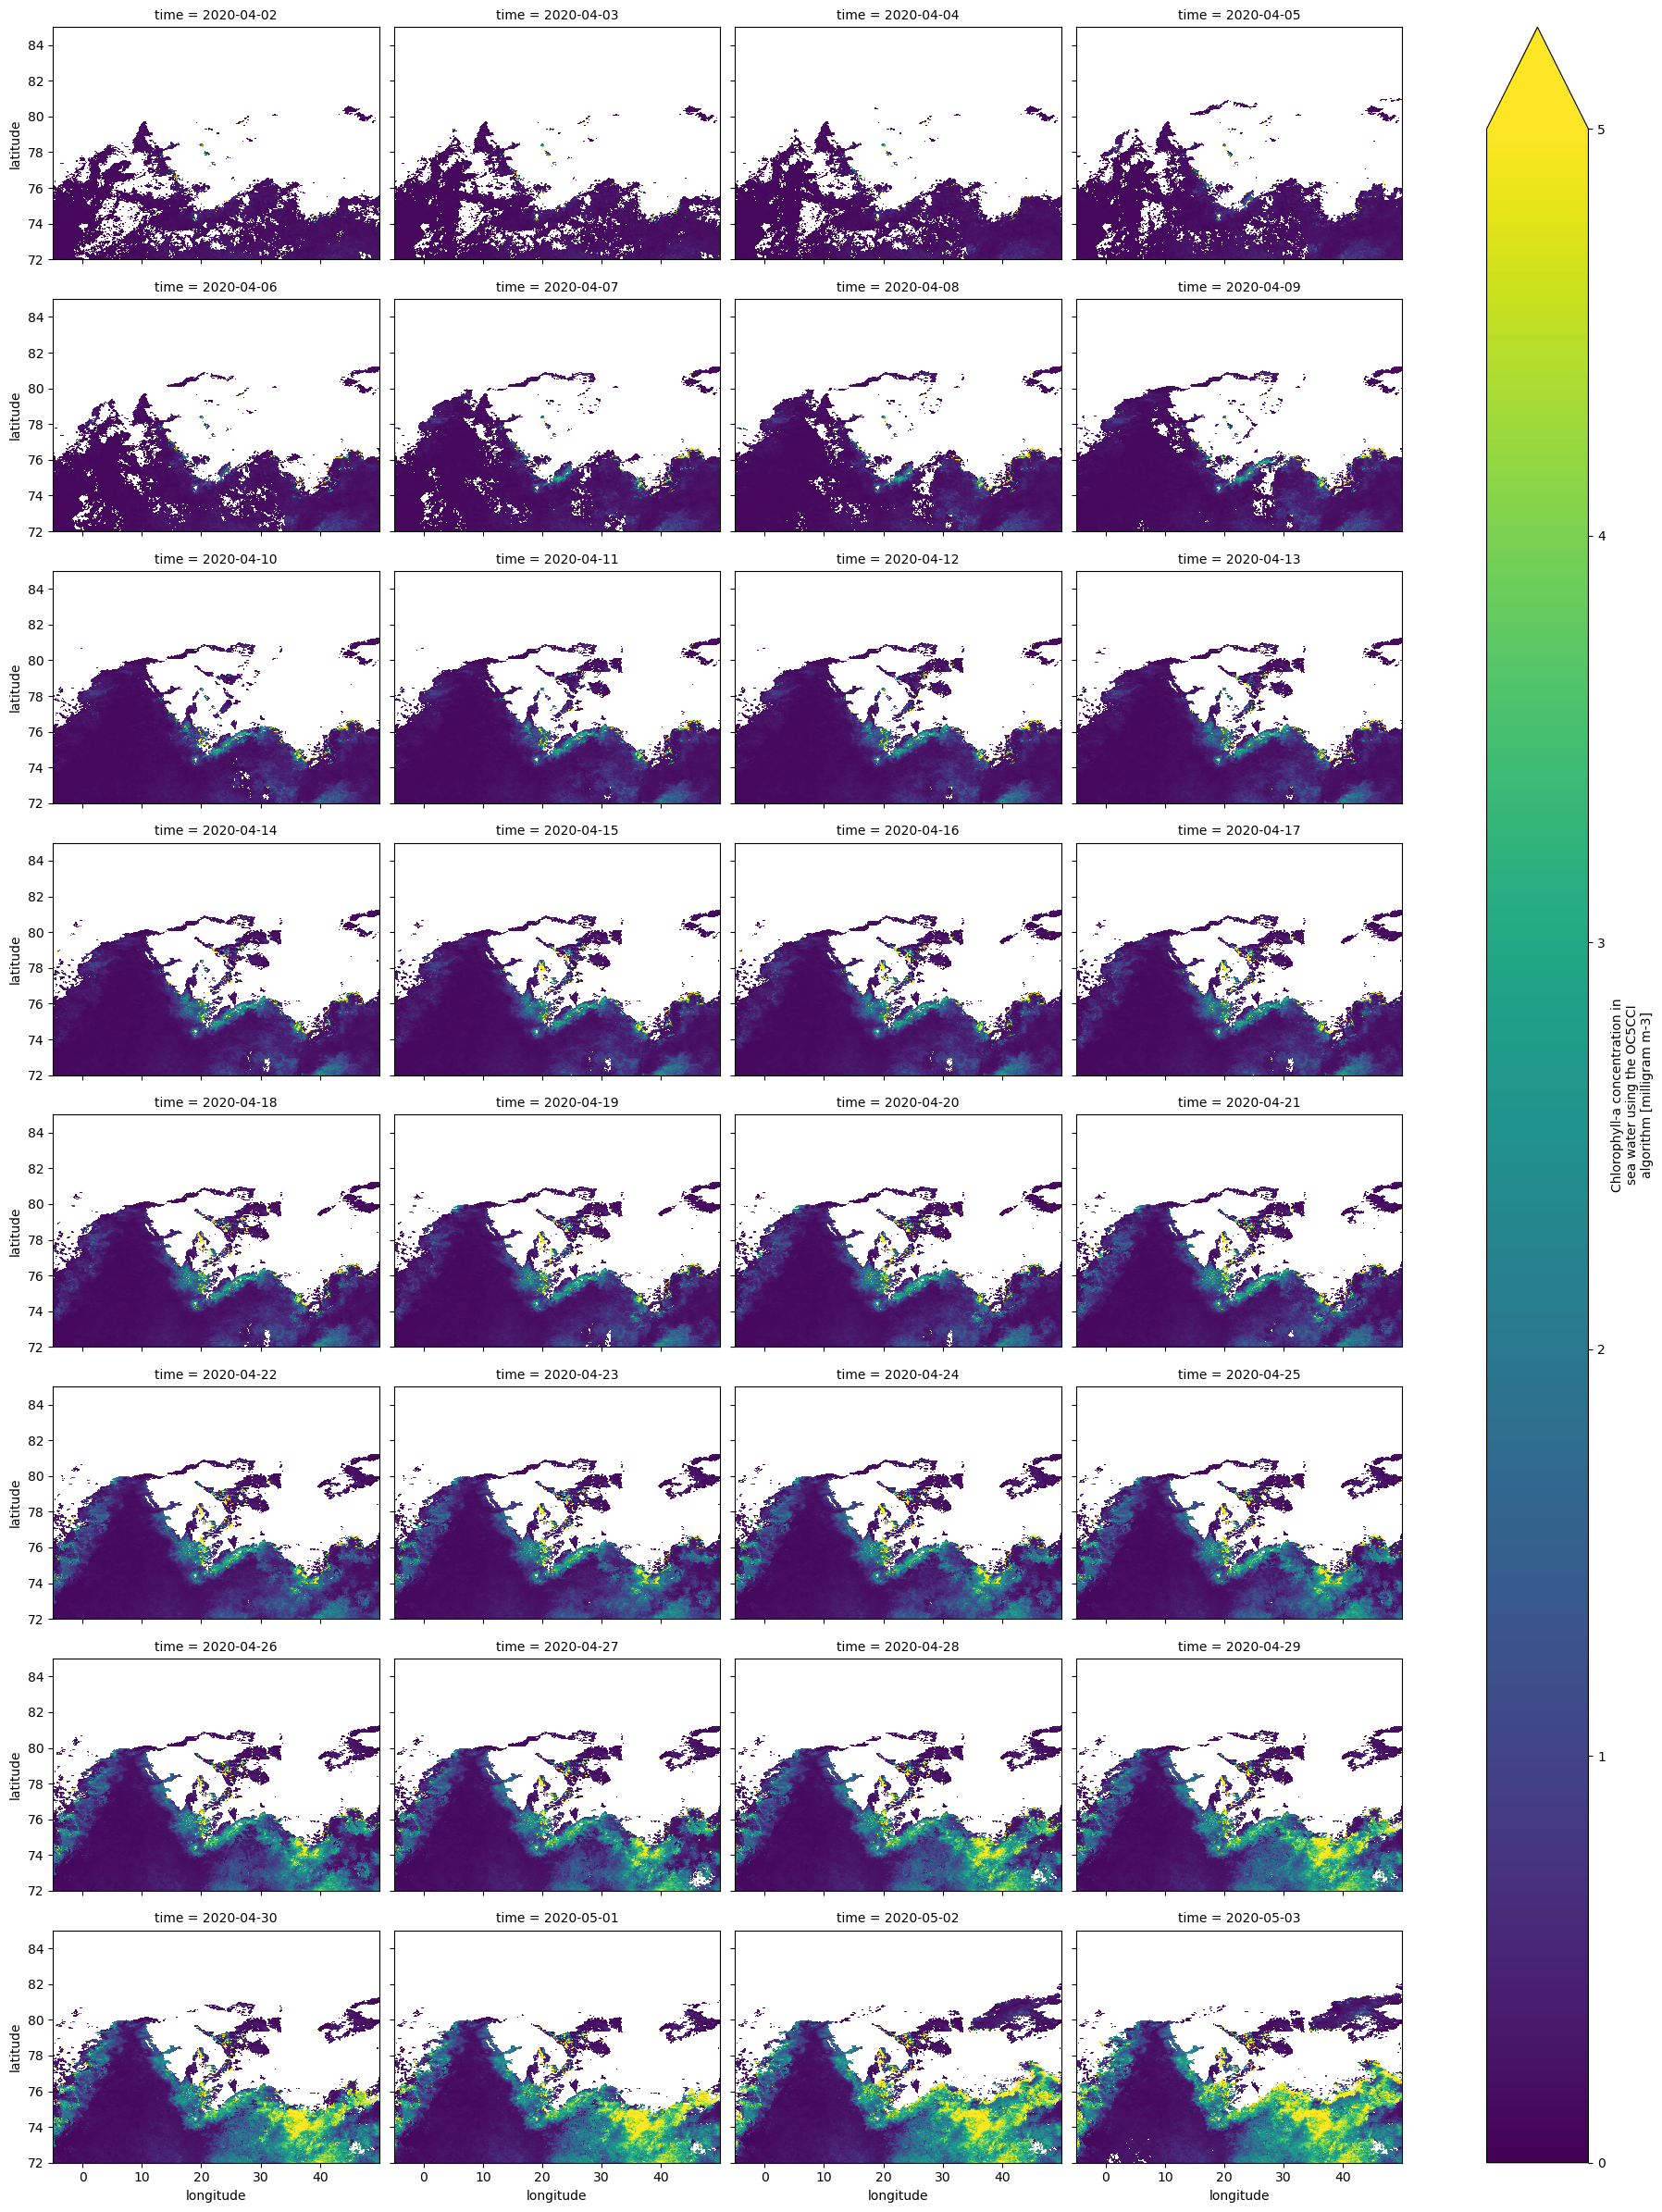

In [6]:
ds_3w.isel(time  =slice(32,64))['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=5, size=3, aspect=1.5)


In [36]:
# define 4 random points in the area
# points = [(75.5, 8.5), (78, 9.5), (79, 10), (73,40)]


# pick 4 points (coordinates couples) randomly from ds

random.seed(1)

# Calcolo la lunghezza del vettore della longitudine
l_longitude = len(ds['longitude'])
l_latitudine = len(ds['latitude'])

# Genero 4 numeri interi casuali tra 1 e la lunghezza del vettore della longitudine
ind_lon = [random.randint(1, l_longitude) for _ in range(4)]
ind_lat = [random.randint(1, l_latitudine) for _ in range(4)]


points = [(ds.longitude[ind_lon[0]].values.item(), ds.latitude[ind_lat[0]].values.item()), (ds.longitude[ind_lon[1]].values.item(), ds.latitude[ind_lat[1]].values.item()), (ds.longitude[ind_lon[2]].values.item(), ds.latitude[ind_lat[2]].values.item()), (ds.longitude[ind_lon[3]].values.item(), ds.latitude[ind_lat[3]].values.item())]

points[3]


[(9.380208333359462, 74.421875),
 (1.7760416666789638, 75.40104166666667),
 (22.244791666716196, 74.91145833333333),
 (7.609375000022908, 76.890625)]

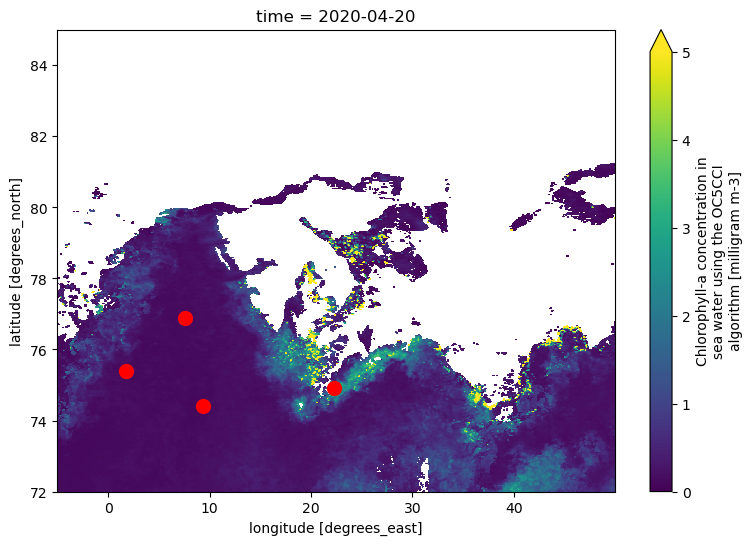

In [37]:
# show me where the points are in a map of the area plot chhl at day 50 and add the points
ds_3w.isel(time=50)['CHL'].plot(size=6, aspect=1.5, cmap='viridis', vmin=0, vmax=5)


lons, lats = zip(*points)

# Plotting the points on the map
plt.scatter(lons, lats, c='red', s=100)  # Adjust color (c) and size (s) as needed


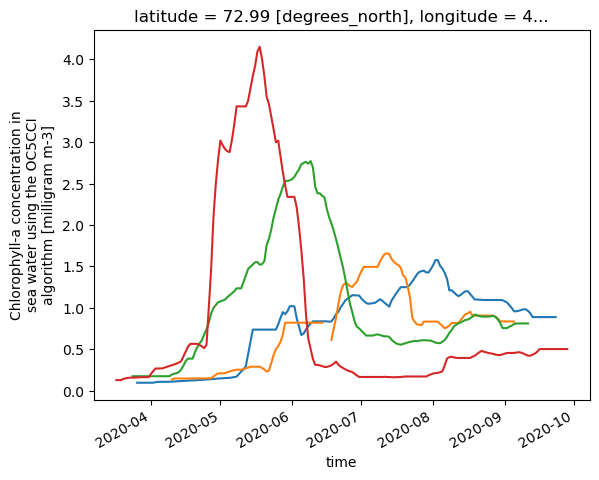

In [19]:
#   for each point extract the values of chl and time and plot them
# for point in points:
#     lat, lon = point
#     chl = ds_3w.sel(latitude=lat, longitude=lon, method='nearest')['CHL']
#     chl.plot(label=point)



In [24]:
#print dimension of chl
# chl.dims

('time',)

In [9]:
ds_3w


<xarray.Dataset>
Dimensions:    (time: 245, latitude: 1248, longitude: 1056)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(42, 1247, 1055), meta=np.ndarray>

In [14]:
points
points[0][0]

75.5

estraggo il primo punto

In [41]:
data_punto = ds_3w.sel(latitude=points[0][1], longitude=points[0][0], method=None)


In [44]:
# data frame from data_punto time, chl, lat, lon
df = data_punto.to_dataframe().reset_index()

In [45]:
df

,time,latitude,longitude,CHL
0,2020-03-01,74.421875,9.380208,NaN
1,2020-03-02,74.421875,9.380208,NaN
2,2020-03-03,74.421875,9.380208,NaN
3,2020-03-04,74.421875,9.380208,NaN
4,2020-03-05,74.421875,9.380208,NaN
...,...,...,...,...
240,2020-10-27,74.421875,9.380208,NaN
241,2020-10-28,74.421875,9.380208,NaN
242,2020-10-29,74.421875,9.380208,NaN
243,2020-10-30,74.421875,9.380208,NaN


<AxesSubplot:title={'center':'chl vs time'}, xlabel='time'>

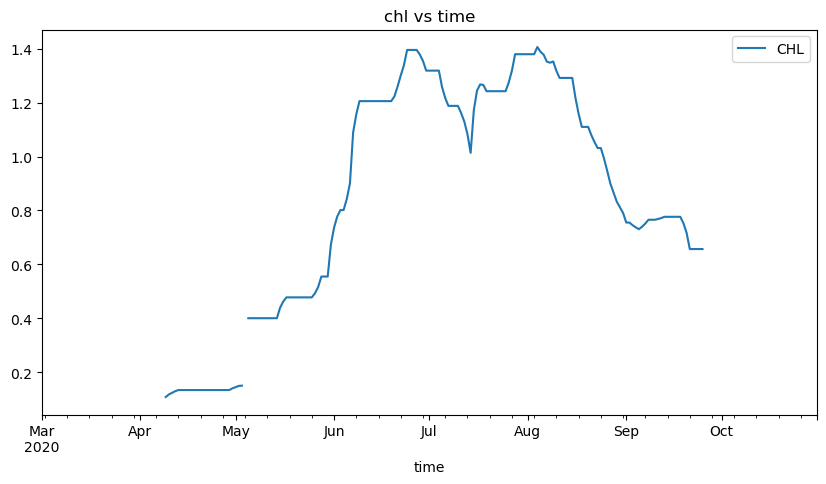

In [46]:
# plot chl vs time
df.plot(x='time', y='CHL', figsize=(10, 5), title='chl vs time')

In [53]:
#remove all valueds from df (dataframe vuoto)
df2 = df[0:0]
df2

,time,latitude,longitude,CHL


,time,latitude,longitude,CHL
39,2020-04-09,74.421875,9.380208,0.108618
40,2020-04-10,74.421875,9.380208,0.118314
41,2020-04-11,74.421875,9.380208,0.124067
42,2020-04-12,74.421875,9.380208,0.130313
43,2020-04-13,74.421875,9.380208,0.134390
...,...,...,...,...
204,2020-09-21,74.421875,9.380208,0.657014
205,2020-09-22,74.421875,9.380208,0.657014
206,2020-09-23,74.421875,9.380208,0.657014
207,2020-09-24,74.421875,9.380208,0.657014


In [55]:
# ciclo per ogni punto in points e creo un dataframe con time, chl, lat, lon (unico per tutti i punti)
for point in points:
    lon, lat = point
    data_punto = ds_3w.sel(latitude=lat, longitude=lon, method=None)
    df = data_punto.to_dataframe().reset_index()
    # append df to df2
    df2 = df2.append(df, ignore_index=True)
    
    
    

/tmp/ipykernel_789/1154976899.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/1154976899.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/1154976899.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/1154976899.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)


In [56]:
# crea colonna lab concatenando lon e lat (prendendo solo le prime 2 cifre decimali)
df2['lab'] = df2['longitude'].round(2).astype(str) + '_' + df2['latitude'].round(2).astype(str)


In [60]:
df2


,time,latitude,longitude,CHL,lab
0,2020-03-01,74.421875,9.380208,NaN,9.38_74.42
1,2020-03-02,74.421875,9.380208,NaN,9.38_74.42
2,2020-03-03,74.421875,9.380208,NaN,9.38_74.42
3,2020-03-04,74.421875,9.380208,NaN,9.38_74.42
4,2020-03-05,74.421875,9.380208,NaN,9.38_74.42
...,...,...,...,...,...
975,2020-10-27,76.890625,7.609375,NaN,7.61_76.89
976,2020-10-28,76.890625,7.609375,NaN,7.61_76.89
977,2020-10-29,76.890625,7.609375,NaN,7.61_76.89
978,2020-10-30,76.890625,7.609375,NaN,7.61_76.89


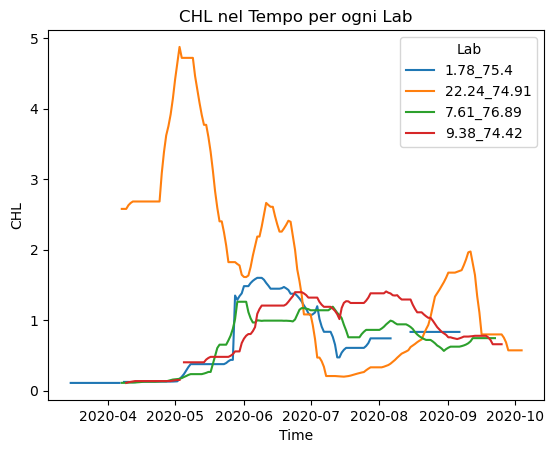

In [67]:
df2['time'] = pd.to_datetime(df2['time'])


for label, group in df2.groupby('lab'):
    plt.plot(group['time'], group['CHL'], label=label)

plt.xlabel('Time')
plt.ylabel('CHL')
plt.legend(title='Lab')
plt.title('CHL nel Tempo per ogni Lab')
plt.show()

In [68]:
df = data_punto.to_dataframe().reset_index()
df2 = df[0:0]
df2

# per ogni anno dal 1998 al 2020 creo un df2 che salvo come csv in data
for year in range(1998, 2000):
    ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
    ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()
    ds_3w= ds_smooth.rolling(time=21, center=True, min_periods=1).mean()



    # ciclo per ogni punto
    for point in points:
        lon, lat = point
        data_punto = ds_3w.sel(latitude=lat, longitude=lon, method=None)
        df = data_punto.to_dataframe().reset_index()
        # append df to df2
        df2 = df2.append(df, ignore_index=True)
        
    
    
    
    
df2['lab'] = df2['longitude'].round(2).astype(str) + '_' + df2['latitude'].round(2).astype(str)



# save df2 as csv
#df2.to_csv('/mnt/d/Dropbox/R_projects/SV_phenology/data/04.2_curve4points.csv', index=False)    

/tmp/ipykernel_789/2250666448.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/2250666448.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/2250666448.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/2250666448.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df, ignore_index=True)
/tmp/ipykernel_789/2250666448.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [69]:

# save df2 as csv 
df2.to_csv('/mnt/d/Dropbox/R_projects/SV_phenology/data/04.2_curve4points.csv', index=False)    

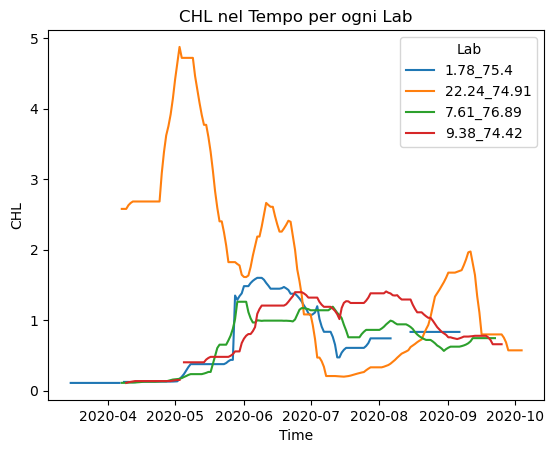

In [70]:
df2['time'] = pd.to_datetime(df2['time'])


for label, group in df2.groupby('lab'):
    plt.plot(group['time'], group['CHL'], label=label)

plt.xlabel('Time')
plt.ylabel('CHL')
plt.legend(title='Lab')
plt.title('CHL nel Tempo per ogni Lab')
plt.show()